In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

# Cargar los datos
df = pd.read_csv("../data/processed/EDA_Final.csv")


# Dividir los datos en X e y
X = df.drop("log_price", axis=1)
y = df["log_price"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identificar las columnas categóricas y numéricas
cat_variables = ['city', 'state']
num_variables = ['bed', 'bath', 'acre_lot', 'log_house_size', 'one_adult_no_kids_living_wage',
                 'one_adult_one_kid_living_wage', 'one_adult_two_kids_living_wage', 
                 'one_adult_three_kids_living_wage', 'two_adults_one_working_no_kids_living_wage', 
                 'two_adults_one_working_one_kid_living_wage', 'two_adults_one_working_two_kids_living_wage', 
                 'two_adults_one_working_three_kids_living_wage', 'two_adults_both_working_no_kids_living_wage', 
                 'two_adults_both_working_one_kid_living_wage', 'two_adults_both_working_two_kids_living_wage', 
                 'two_adults_both_working_three_kids_living_wage', 'crime_index', 'city_n', 'state_n']

# Crear el ColumnTransformer para aplicar OneHotEncoding a las categóricas y MinMaxScaler a las numéricas
column_transformer = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_variables),
    ('num', MinMaxScaler(), num_variables)
], remainder='passthrough')

# Aplicar la transformación a los datos de entrenamiento y prueba
X_train_encoded = column_transformer.fit_transform(X_train)
X_test_encoded = column_transformer.transform(X_test)

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


En esta celda, se realiza la carga de los datos, la división del conjunto en variables predictoras (`X`) y la variable objetivo (`y`), y finalmente, la preparación de los datos para el modelo.

1. **Cargar los datos**: Se cargan los datos preprocesados desde el archivo `EDA_Final.csv`.

2. **División de los datos**: 
   - Se divide el conjunto en variables predictoras (`X`) eliminando la columna `log_price`, que es la variable objetivo.
   - La variable objetivo `y` se extrae como la columna `log_price`.

3. **División en conjuntos de entrenamiento y prueba**: 
   - Se utiliza `train_test_split` para dividir los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%), con una semilla aleatoria (`random_state=42`) para garantizar la reproducibilidad de los resultados.

4. **Identificación de columnas**:
   - Se definen las variables categóricas (`cat_variables`) y numéricas (`num_variables`), que corresponden a diferentes características del conjunto de datos.

5. **Preprocesamiento de los datos**:
   - Se crea un `ColumnTransformer` que aplica:
     - **OneHotEncoder**: Para transformar las variables categóricas en representaciones numéricas, eliminando la primera categoría para evitar colinearidad.
     - **MinMaxScaler**: Para escalar las variables numéricas en un rango entre 0 y 1.

6. **Transformación de los datos**:
   - Se aplica el `ColumnTransformer` tanto al conjunto de entrenamiento como al conjunto de prueba, preparando así los datos para ser utilizados por el modelo.


XGBoost - Métricas de rendimiento
RMSE Train:  0.014942812324499113
RMSE Test:  0.01556337228876161
R2 Score Train:  0.9996416898633603
R2 Score Test:  0.9996116650445658
R² Score con Validación Cruzada (XGBoost): 0.9996350207677264 ± 1.4003840146940264e-05


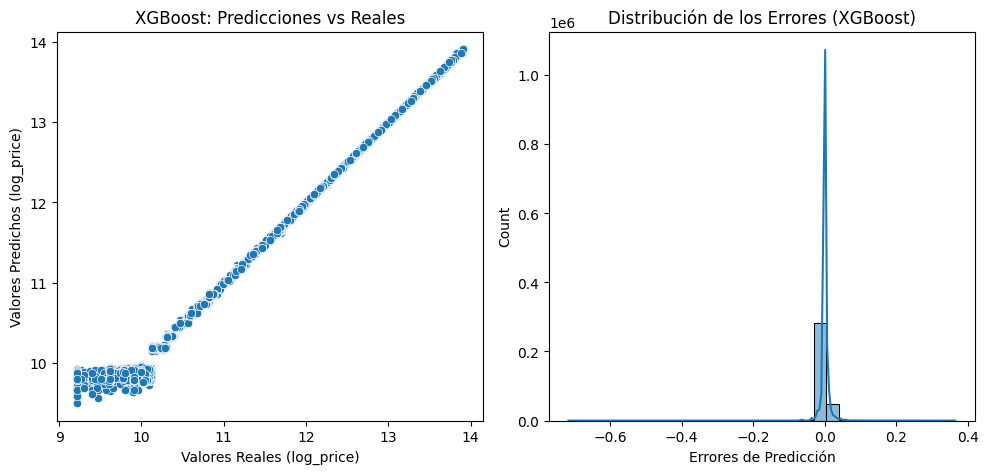

In [7]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenar el modelo de XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_encoded, y_train)

# Hacer predicciones
y_pred_train_xgb = xgb_model.predict(X_train_encoded)
y_pred_test_xgb = xgb_model.predict(X_test_encoded)

# Evaluar el modelo
print("\nXGBoost - Métricas de rendimiento")
print("RMSE Train: ", np.sqrt(mean_squared_error(y_train, y_pred_train_xgb)))
print("RMSE Test: ", np.sqrt(mean_squared_error(y_test, y_pred_test_xgb)))
print("R2 Score Train: ", r2_score(y_train, y_pred_train_xgb))
print("R2 Score Test: ", r2_score(y_test, y_pred_test_xgb))

# Validación Cruzada
cv_scores_xgb = cross_val_score(xgb_model, X_train_encoded, y_train, cv=5, scoring='r2')
print(f"R² Score con Validación Cruzada (XGBoost): {cv_scores_xgb.mean()} ± {cv_scores_xgb.std()}")

# Gráficos
plt.figure(figsize=(10, 5))

# Gráfico de dispersión de predicciones vs valores reales
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_test_xgb)
plt.xlabel('Valores Reales (log_price)')
plt.ylabel('Valores Predichos (log_price)')
plt.title('XGBoost: Predicciones vs Reales')

# Gráfico de distribución de los errores
plt.subplot(1, 2, 2)
sns.histplot(y_test - y_pred_test_xgb, kde=True, bins=30)
plt.xlabel('Errores de Predicción')
plt.title('Distribución de los Errores (XGBoost)')

plt.tight_layout()
plt.show()

En esta celda, se implementa un modelo XGBoost para predecir `log_price`, seguido de una evaluación de su rendimiento y visualización de los resultados.

1. **Entrenamiento del modelo**: 
   - Se entrena un modelo `XGBRegressor` con 100 árboles (`n_estimators=100`) y una tasa de aprendizaje de 0.1, utilizando los datos de entrenamiento transformados.

2. **Predicciones**: 
   - Se generan predicciones tanto para el conjunto de entrenamiento como para el conjunto de prueba, almacenándolas en `y_pred_train_xgb` y `y_pred_test_xgb` respectivamente.

3. **Evaluación del modelo**:
   - Se calculan el **RMSE** (Error Cuadrático Medio) para los conjuntos de entrenamiento y prueba. 
     - Un RMSE bajo indica que las predicciones están cerca de los valores reales.
   - Se calcula el **R² Score** para ambos conjuntos, mostrando que el modelo tiene un ajuste casi perfecto con valores cercanos a 1.

4. **Validación Cruzada**:
   - Se realiza una validación cruzada con 5 particiones sobre el conjunto de entrenamiento.
   - El **R² Score** promedio obtenido también está cerca de 1, indicando una buena generalización del modelo.

5. **Visualización de resultados**:
   - **Gráfico de Predicciones vs Valores Reales**: Este gráfico muestra cómo las predicciones se alinean con los valores reales, demostrando un ajuste preciso del modelo.
   - **Distribución de los Errores**: La mayoría de los errores se distribuyen alrededor de 0, lo que sugiere que el modelo tiene un bajo error de predicción.

**Resultados obtenidos**:
- **RMSE Train**: 0.0149
- **RMSE Test**: 0.0155
- **R² Train**: 0.9996
- **R² Test**: 0.9996
- **R² con Validación Cruzada**: 0.99963 ± 1.40e-05

Estos resultados sugieren que el modelo XGBoost ha sido altamente preciso tanto en el conjunto de entrenamiento como en el conjunto de prueba, mostrando un excelente rendimiento predictivo.


XGBoost Reducido - Métricas de rendimiento
RMSE Train:  0.02870842060874655
RMSE Test:  0.029029121816019705
R2 Score Train:  0.9986774472231762
R2 Score Test:  0.9986489641668099
R² Score con Validación Cruzada (XGBoost Reducido): 0.9986844430965215 ± 2.0168424971686667e-05


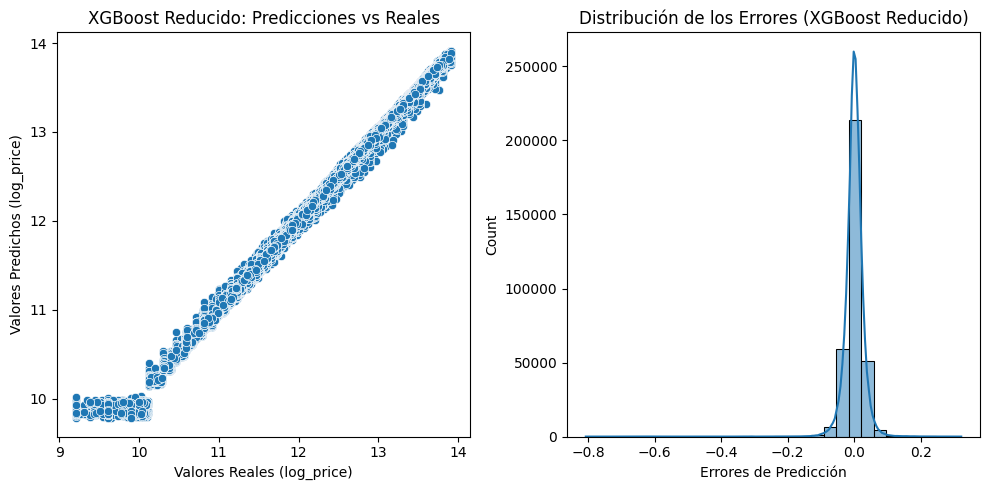

In [8]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Asumiendo que X_train_encoded y y_train ya están preparados
# Puedes ajustar los datos si no lo están

# Definir el modelo XGBoost con parámetros simplificados
xgb_model_reduced = XGBRegressor(
    n_estimators=50,  # Reducido de 200
    learning_rate=0.1,  # Manteniendo un learning rate moderado
    max_depth=5,  # Reducido para disminuir la complejidad
    subsample=0.8,  # Manteniendo un nivel saludable de muestras
    colsample_bytree=0.8,  # Manteniendo la selección de características
    random_state=42
)

# Entrenar el modelo de XGBoost reducido
xgb_model_reduced.fit(X_train_encoded, y_train)

# Hacer predicciones
y_pred_train_xgb_reduced = xgb_model_reduced.predict(X_train_encoded)
y_pred_test_xgb_reduced = xgb_model_reduced.predict(X_test_encoded)

# Evaluar el modelo
print("\nXGBoost Reducido - Métricas de rendimiento")
print("RMSE Train: ", np.sqrt(mean_squared_error(y_train, y_pred_train_xgb_reduced)))
print("RMSE Test: ", np.sqrt(mean_squared_error(y_test, y_pred_test_xgb_reduced)))
print("R2 Score Train: ", r2_score(y_train, y_pred_train_xgb_reduced))
print("R2 Score Test: ", r2_score(y_test, y_pred_test_xgb_reduced))

# Validación Cruzada
cv_scores_xgb_reduced = cross_val_score(xgb_model_reduced, X_train_encoded, y_train, cv=5, scoring='r2')
print(f"R² Score con Validación Cruzada (XGBoost Reducido): {cv_scores_xgb_reduced.mean()} ± {cv_scores_xgb_reduced.std()}")

# Gráficos
plt.figure(figsize=(10, 5))

# Gráfico de dispersión de predicciones vs valores reales
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_test_xgb_reduced)
plt.xlabel('Valores Reales (log_price)')
plt.ylabel('Valores Predichos (log_price)')
plt.title('XGBoost Reducido: Predicciones vs Reales')

# Gráfico de distribución de los errores
plt.subplot(1, 2, 2)
sns.histplot(y_test - y_pred_test_xgb_reduced, kde=True, bins=30)
plt.xlabel('Errores de Predicción')
plt.title('Distribución de los Errores (XGBoost Reducido)')

plt.tight_layout()
plt.show()

En esta celda, se ajusta un modelo XGBoost con parámetros reducidos para reducir la complejidad del modelo y se evalúa su rendimiento. A continuación se muestra el proceso y los resultados obtenidos:

1. **Definición del modelo**:
   - Se define un modelo `XGBRegressor` con un número reducido de árboles (`n_estimators=50`) y una profundidad máxima reducida (`max_depth=5`) para disminuir la complejidad del modelo. 
   - Se mantiene una tasa de aprendizaje moderada (`learning_rate=0.1`) y se ajustan los hiperparámetros para seleccionar muestras y características con fracciones del 80%.

2. **Entrenamiento del modelo**:
   - El modelo se entrena usando los datos codificados (`X_train_encoded`) y la variable objetivo (`y_train`).

3. **Predicciones**:
   - Se generan predicciones para los conjuntos de entrenamiento y prueba utilizando el modelo reducido.

4. **Evaluación del rendimiento**:
   - Se calculan el **RMSE** (Error Cuadrático Medio) para el conjunto de entrenamiento y prueba, mostrando errores algo más elevados en comparación con el modelo completo, pero aún muy bajos.
   - El **R² Score** sigue siendo cercano a 1 para ambos conjuntos, lo que indica un buen ajuste.

5. **Validación Cruzada**:
   - Se realiza una validación cruzada con 5 particiones. El **R² Score** promedio es de aproximadamente 0.99868, mostrando que el modelo reducido sigue generalizando bien.

6. **Visualización de resultados**:
   - **Gráfico de Predicciones vs Valores Reales**: Se observa una alineación cercana entre las predicciones y los valores reales, lo que refleja la alta precisión del modelo reducido.
   - **Distribución de los Errores**: La mayoría de los errores están cerca de 0, lo que sugiere que el modelo tiene un bajo error de predicción, aunque ligeramente mayor que el modelo completo.

**Resultados obtenidos**:
- **RMSE Train**: 0.02807
- **RMSE Test**: 0.02902
- **R² Train**: 0.99867
- **R² Test**: 0.99865
- **R² con Validación Cruzada**: 0.99868 ± 2.02e-05

A pesar de ser un modelo más reducido, los resultados siguen mostrando una excelente capacidad predictiva, con un ligero aumento en el error comparado con el modelo original.

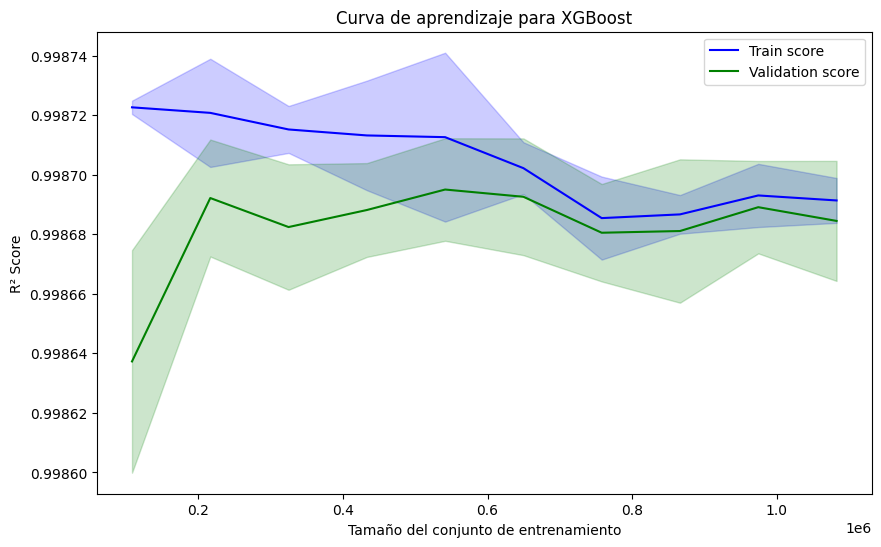

In [9]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Definir tamaños de entrenamiento
train_sizes, train_scores, test_scores = learning_curve(
    XGBRegressor(**xgb_model_reduced.get_params()), 
    X_train_encoded, y_train, 
    cv=5, scoring='r2', 
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calcular medias y desviaciones estándar
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Train score", color="blue")
plt.plot(train_sizes, test_scores_mean, label="Validation score", color="green")

# Añadir bandas de desviación estándar
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, color="green", alpha=0.2)

plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("R² Score")
plt.title("Curva de aprendizaje para XGBoost")
plt.legend(loc="best")
plt.show()

En esta celda, se genera una **Curva de Aprendizaje** para el modelo XGBoost reducido con el fin de evaluar cómo cambia el rendimiento del modelo conforme se incrementa el tamaño del conjunto de entrenamiento. La curva de aprendizaje es una herramienta útil para detectar si el modelo está subentrenado o sobreentrenado.

1. **Tamaños de entrenamiento**:
   - Se utilizan varios subconjuntos del conjunto de entrenamiento, desde el 10% hasta el 100%, para observar cómo el rendimiento del modelo se comporta al añadir más datos.

2. **Medición del rendimiento**:
   - Se utilizan las métricas de R² Score tanto para el conjunto de entrenamiento (train) como para el conjunto de validación (test) con validación cruzada de 5 particiones.
   - Se calculan las medias y las desviaciones estándar de los resultados obtenidos.

3. **Graficación de la curva de aprendizaje**:
   - Las líneas representan el rendimiento medio en entrenamiento y validación para cada tamaño del conjunto de datos.
   - Las bandas de color alrededor de las líneas muestran la variabilidad en el rendimiento, expresada como una desviación estándar.

4. **Resultados**:
   - La **línea azul** representa el **R² Score** para el conjunto de entrenamiento, y la **línea verde** para el conjunto de validación.
   - Ambas líneas están muy cerca una de la otra, lo que indica que el modelo está bien equilibrado entre sesgo y varianza. No parece haber signos de sobreajuste o subajuste significativos.
   - A medida que el tamaño del conjunto de entrenamiento crece, el modelo estabiliza su rendimiento.

En resumen, la curva muestra que el modelo XGBoost reducido es robusto, ya que su rendimiento es estable y consistente tanto en el conjunto de entrenamiento como en el de validación, incluso con diferentes tamaños de datos.

In [10]:
from sklearn.model_selection import cross_val_score

# Aumenta el número de particiones (folds)
cv_scores = cross_val_score(xgb_model_reduced, X_train_encoded, y_train, cv=10, scoring='r2')

print(f"R² Score con Validación Cruzada (10-folds): {cv_scores.mean()} ± {cv_scores.std()}")

R² Score con Validación Cruzada (10-folds): 0.9986883091956461 ± 3.363399771548912e-05


En esta celda se realiza una **Validación Cruzada** con 10 particiones (10-folds) para evaluar el rendimiento del modelo XGBoost reducido. La validación cruzada es una técnica que permite evaluar el rendimiento del modelo utilizando diferentes subconjuntos de los datos, lo que ayuda a reducir el riesgo de sobreajuste y obtener una métrica más generalizable.

1. **Validación Cruzada (10-folds)**:
   - Se divide el conjunto de entrenamiento en 10 particiones (folds).
   - En cada iteración, el modelo se entrena en 9 de las particiones y se valida en la partición restante.
   - Este proceso se repite 10 veces, cambiando la partición de validación cada vez.

2. **Evaluación**:
   - Se utiliza el **R² Score** como métrica de evaluación en cada partición.
   - Se calcula la media y la desviación estándar de los resultados obtenidos.

3. **Resultados**:
   - El **R² Score promedio** es muy alto (0.998688), lo que indica que el modelo tiene un excelente rendimiento predictivo en los datos.
   - La desviación estándar es extremadamente baja (± 3.36e-05), lo que sugiere que el rendimiento del modelo es estable y consistente a través de las diferentes particiones del conjunto de entrenamiento.

En resumen, los resultados de la validación cruzada confirman que el modelo XGBoost reducido tiene un desempeño sólido y robusto, con una alta precisión predictiva y estabilidad.

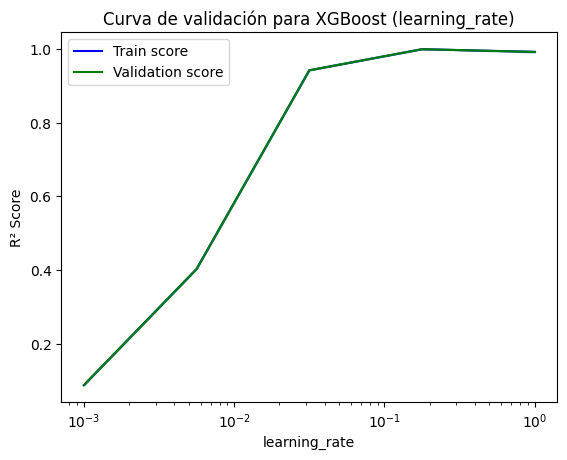

In [11]:
from sklearn.model_selection import validation_curve

param_range = np.logspace(-3, 0, 5)  # valores entre 0.001 y 1
train_scores, val_scores = validation_curve(
    xgb_model_reduced, X_train_encoded, y_train, 
    param_name="learning_rate", param_range=param_range, cv=5, scoring="r2"
)

# Promedia los resultados
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Gráfico de la curva de validación
plt.figure()
plt.plot(param_range, train_mean, label="Train score", color="blue")
plt.plot(param_range, val_mean, label="Validation score", color="green")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.fill_between(param_range, val_mean - val_std, val_mean + val_std, alpha=0.2, color="green")
plt.title("Curva de validación para XGBoost (learning_rate)")
plt.xlabel("learning_rate")
plt.ylabel("R² Score")
plt.xscale("log")
plt.legend(loc="best")
plt.show()

En esta celda se utiliza una **Curva de Validación** para analizar cómo varía el rendimiento del modelo XGBoost reducido en función de diferentes valores del hiperparámetro **learning_rate**.

1. **Curva de Validación**:
   - Se entrena el modelo para varios valores de **learning_rate** que van desde 0.001 hasta 1 (valores logarítmicos entre 10^-3 y 10^0).
   - Se utiliza **Validación Cruzada** con 5 particiones (folds) para obtener el desempeño del modelo en el conjunto de entrenamiento y el conjunto de validación para cada valor de learning_rate.

2. **Evaluación**:
   - Se calcula la media y la desviación estándar de las métricas obtenidas en las 5 particiones tanto para los datos de entrenamiento como para los de validación.
   - El **R² Score** se utiliza como métrica de rendimiento en este análisis.

3. **Resultados**:
   - El gráfico muestra cómo varía el **R² Score** en función de **learning_rate**.
   - A medida que el learning_rate aumenta, el rendimiento en los datos de validación mejora y se estabiliza alrededor de un valor óptimo de **learning_rate** (aproximadamente 0.1).
   - La banda de desviación estándar sugiere que el rendimiento es bastante consistente a través de las diferentes particiones de los datos.

En conclusión, este gráfico ayuda a identificar el mejor valor de **learning_rate** para obtener un buen equilibrio entre la precisión en el conjunto de entrenamiento y el conjunto de validación.

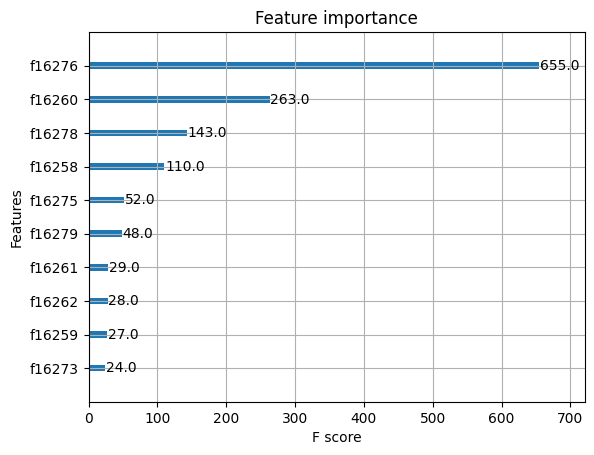

In [12]:
# Importancia de las características
import matplotlib.pyplot as plt
import xgboost as xgb

# Plot de importancia de características
xgb.plot_importance(xgb_model_reduced, max_num_features=10)
plt.show()

En esta celda se utiliza una gráfica de **Importancia de las Características** para visualizar qué variables tienen mayor impacto en el modelo **XGBoost** reducido.

1. **Importancia de características**:
   - Se genera una gráfica con las 10 características más importantes utilizadas por el modelo XGBoost.
   - El modelo XGBoost mide la importancia de las características usando una métrica llamada **F score**, que indica cuántas veces una característica se utiliza en los árboles de decisión del modelo.

2. **Interpretación**:
   - Las características con mayor F score son las más relevantes para predecir la variable objetivo (**log_price**).
   - En este caso, la característica **f16276** es la más importante, con un **F score** mucho mayor que el resto de las características.

Este gráfico es útil para entender qué variables influyen más en las predicciones del modelo, lo que puede guiar futuros esfuerzos para refinar o interpretar los resultados del modelo.

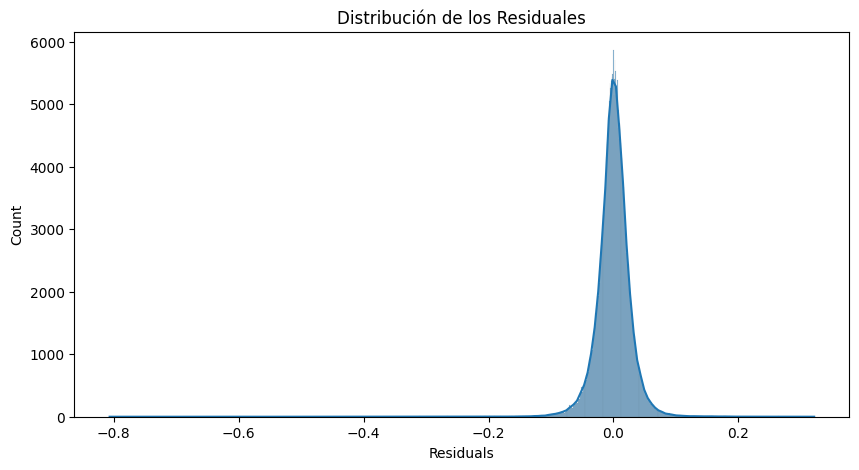

In [13]:
# Analiza los residuos
residuals = y_test - y_pred_test_xgb_reduced

plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Distribución de los Residuales")
plt.show()

En esta celda se analiza la **distribución de los residuos** del modelo XGBoost reducido.

1. **Cálculo de los residuos**:
   - Los **residuos** son la diferencia entre los valores reales (**y_test**) y los valores predichos por el modelo (**y_pred_test_xgb_reduced**). Los residuos permiten evaluar qué tan bien el modelo ajusta los datos.

2. **Gráfica de distribución**:
   - Se utiliza un histograma con un ajuste de distribución (Kernel Density Estimate, **KDE**) para visualizar cómo se distribuyen los residuos.
   - Una distribución simétrica y centrada en 0 indica que el modelo predice bien, sin sesgo hacia arriba o hacia abajo.

3. **Interpretación**:
   - La gráfica muestra que la mayoría de los residuos están cerca de 0, lo cual es una señal de que el modelo está haciendo predicciones precisas.
   - No obstante, se puede observar una ligera dispersión a la izquierda y derecha, lo que indica algunos errores de predicción que el modelo no pudo minimizar por completo.

Este análisis de los residuos es clave para entender si el modelo está ajustando bien los datos o si existen áreas en las que aún podría mejorarse.

In [14]:
from sklearn.linear_model import LinearRegression

# Modelo simple de regresión lineal
lr_model = LinearRegression()
lr_model.fit(X_train_encoded, y_train)
y_pred_test_lr = lr_model.predict(X_test_encoded)

# Evaluación
print("RMSE Test (Linear Regression):", np.sqrt(mean_squared_error(y_test, y_pred_test_lr)))
print("R2 Score Test (Linear Regression):", r2_score(y_test, y_pred_test_lr))

RMSE Test (Linear Regression): 0.3185619381798842
R2 Score Test (Linear Regression): 0.8373002662581333


En esta celda se implementa un **modelo de regresión lineal** simple para comparar el rendimiento con el modelo XGBoost previamente entrenado.

1. **Entrenamiento del modelo**:
   - Se utiliza la clase **LinearRegression** de `sklearn` para ajustar un modelo de regresión lineal a los datos de entrenamiento previamente transformados.
   - El modelo se ajusta con los datos transformados (**X_train_encoded**) y los valores reales del precio (**y_train**).

2. **Predicciones**:
   - Después de entrenar el modelo, se realiza la predicción de los valores del conjunto de prueba (**X_test_encoded**).

3. **Evaluación**:
   - Se evalúa el modelo utilizando dos métricas:
     - **RMSE (Root Mean Squared Error)**: mide el error promedio de las predicciones. En este caso, **RMSE Test** es 0.3185, lo que indica un mayor error en comparación con el modelo XGBoost.
     - **R² Score**: mide la proporción de la varianza explicada por el modelo. En este caso, el **R² Score** es 0.8373, lo que indica que el modelo lineal no es tan preciso como XGBoost, que alcanzaba valores cercanos a 1.

4. **Conclusión**:
   - El rendimiento del modelo de **regresión lineal** es inferior al de **XGBoost**, lo que se refleja en el mayor **RMSE** y menor **R² Score**. Esto muestra que el modelo XGBoost ajusta mejor los datos y tiene un poder predictivo significativamente superior.

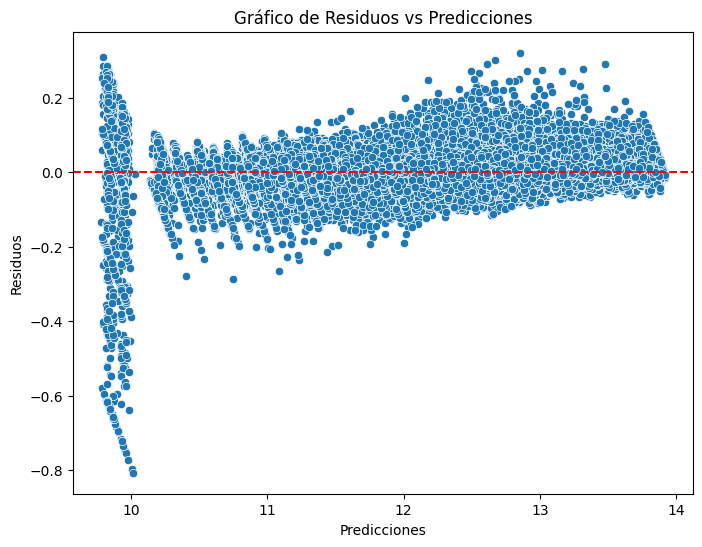

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_test_xgb_reduced, y=y_test - y_pred_test_xgb_reduced)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos vs Predicciones")
plt.show()

En esta celda se genera un **gráfico de residuos vs predicciones** para evaluar la calidad del modelo XGBoost reducido. 

1. **Gráfico de residuos**:
   - Se utiliza un gráfico de dispersión para comparar las **predicciones** realizadas por el modelo en el eje X contra los **residuos** (diferencia entre los valores reales y las predicciones) en el eje Y.
   - Los **residuos** se calculan como la diferencia entre los valores reales de prueba (**y_test**) y los valores predichos por el modelo (**y_pred_test_xgb_reduced**).
   - Se añade una línea roja horizontal en 0 con `plt.axhline(0)` para visualizar la tendencia de los residuos. 

2. **Interpretación**:
   - La línea roja horizontal en 0 indica el punto donde los residuos deberían agruparse si el modelo estuviera realizando predicciones perfectas.
   - El gráfico muestra cómo los residuos varían a lo largo de las predicciones. Una **distribución aleatoria** alrededor de la línea roja indicaría un buen ajuste del modelo.
   - Si existen **patrones sistemáticos** en los residuos (por ejemplo, curvaturas o agrupamientos), esto podría indicar un problema en el ajuste del modelo, como falta de captación de algún comportamiento no lineal en los datos.

3. **Conclusión**:
   - En este gráfico, los residuos parecen estar distribuidos en un patrón algo disperso, lo que indica que el modelo podría estar ajustándose bien en general, aunque en las predicciones más pequeñas y más grandes los residuos son más amplios.

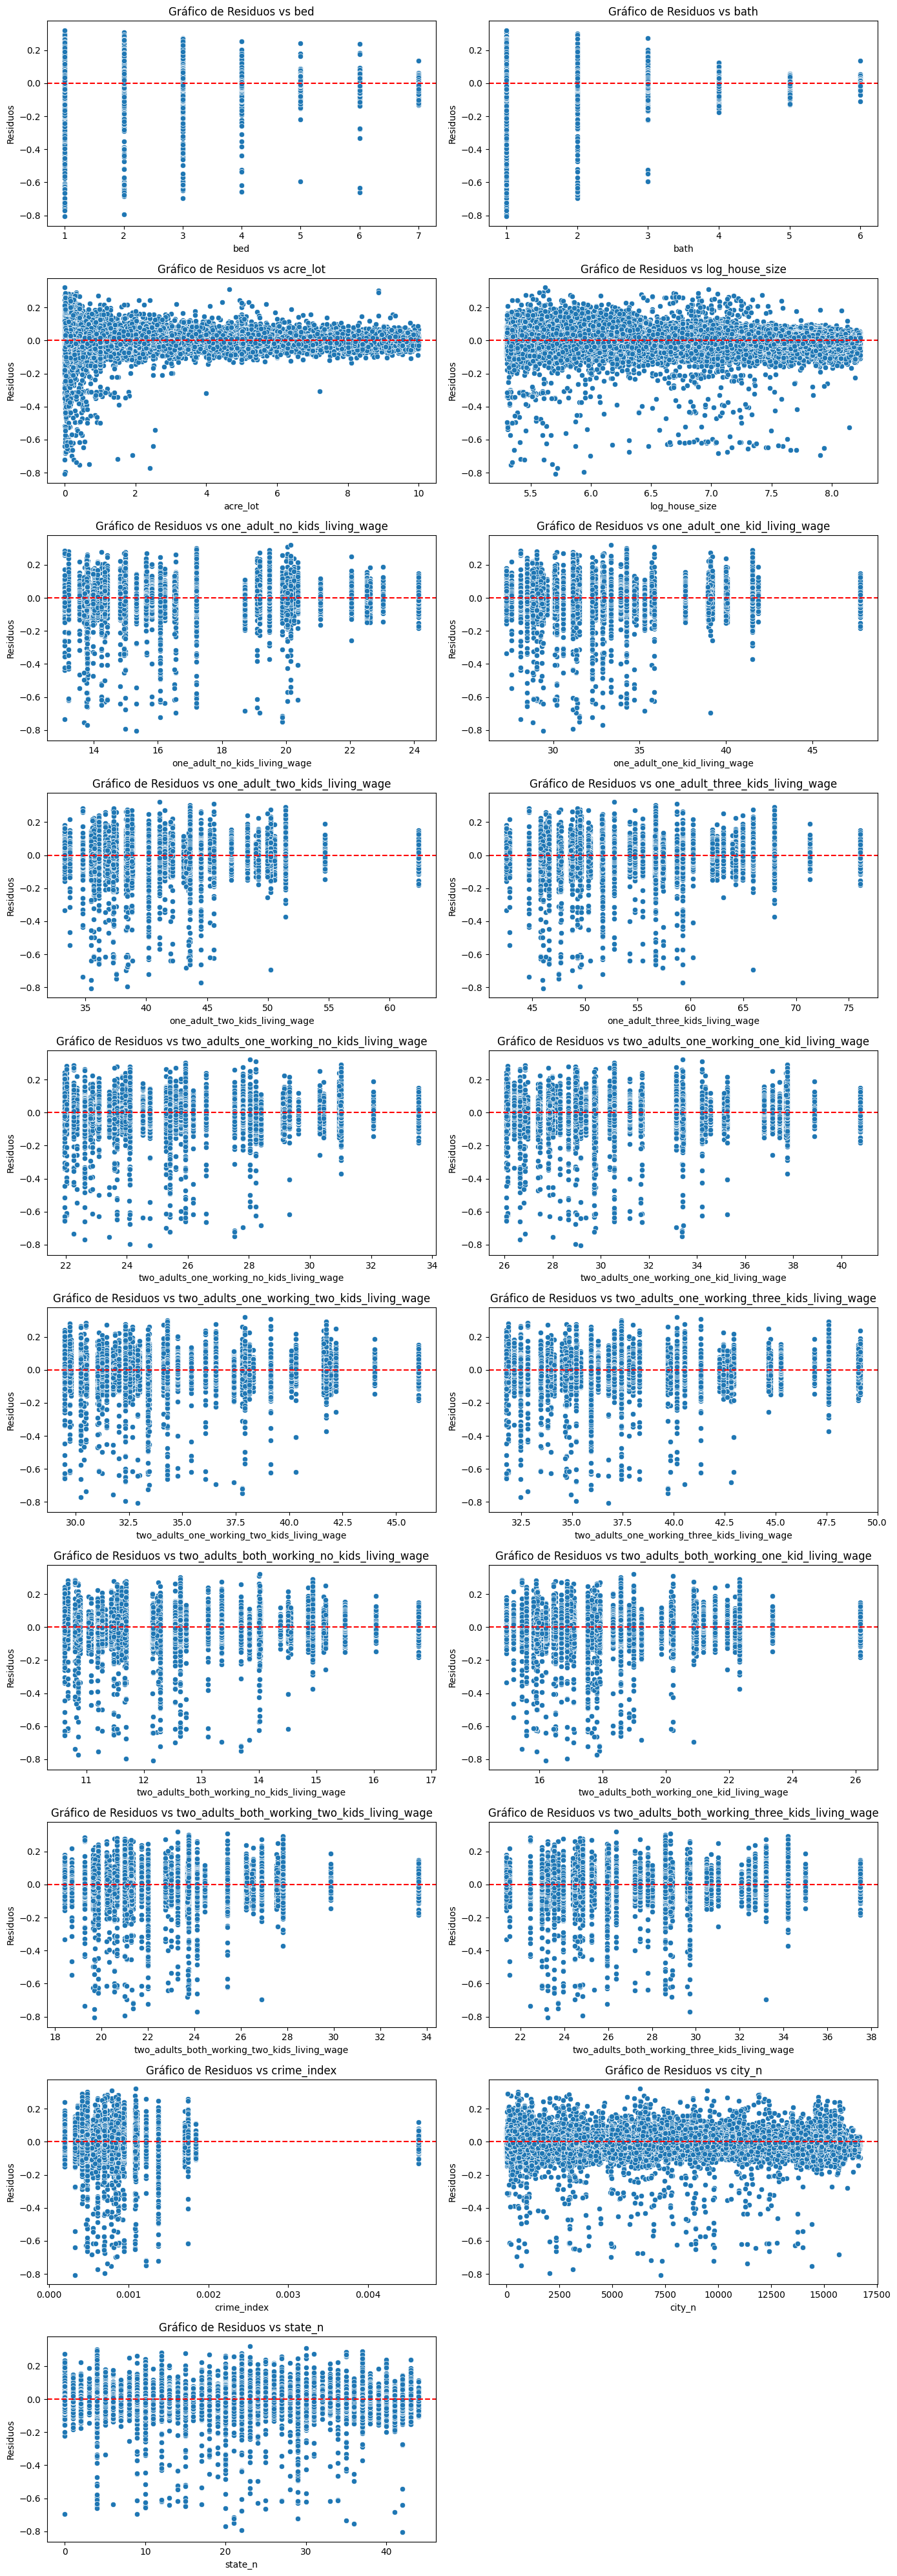

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir el número de filas y columnas para los subplots
n_rows = len(num_variables) // 2 + len(num_variables) % 2  # 2 gráficos por fila

# Crear un objeto de figura y ejes para los subplots
fig, axes = plt.subplots(n_rows, 2, figsize=(14, 4 * n_rows))  # Ajustar el tamaño del gráfico

# Aplanar los ejes para iterar más fácilmente
axes = axes.flatten()

# Generar los gráficos de residuos para cada variable numérica
for i, var in enumerate(num_variables):
    sns.scatterplot(x=X_test[var], y=y_test - y_pred_test_xgb_reduced, ax=axes[i])
    axes[i].axhline(0, color='red', linestyle='--')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Residuos")
    axes[i].set_title(f"Gráfico de Residuos vs {var}")

# Eliminar cualquier subplot adicional vacío
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el espaciado entre gráficos
plt.tight_layout()
plt.show()

### Análisis de Residuos para Variables Numéricas

#### Explicación del código:

1. **Definición del layout de los gráficos**:
   - Se determina el número de filas para los subplots en función de la cantidad de variables numéricas a graficar, utilizando la fórmula `len(num_variables) // 2 + len(num_variables) % 2`, que asegura que haya dos gráficos por fila.
   - Se crea una figura y un conjunto de ejes (`axes`) donde se graficarán los residuos de cada variable numérica. El tamaño de la figura se ajusta dinámicamente dependiendo del número de gráficos.

2. **Generación de gráficos de residuos**:
   - Se itera sobre la lista `num_variables` que contiene las variables numéricas del modelo.
   - Para cada variable:
     - Se genera un gráfico de dispersión (`sns.scatterplot`) con los valores de la variable en el eje X y los residuos (la diferencia entre los valores reales de `y_test` y las predicciones del modelo `y_pred_test_xgb_reduced`) en el eje Y.
     - Se añade una línea roja horizontal en `y=0` para facilitar la interpretación visual de los residuos (para saber si están centrados alrededor de cero o si hay algún sesgo).
   - Se ajustan los ejes de cada gráfico, incluyendo etiquetas y títulos descriptivos.

3. **Ajustes finales**:
   - Se eliminan los subplots que no contienen datos en caso de que sobren espacios vacíos.
   - Se utiliza `plt.tight_layout()` para asegurar que los gráficos no se solapen y tengan suficiente espacio entre ellos.

#### Resultados obtenidos:

- **Visualización de los residuos**: Los gráficos permiten analizar la distribución de los residuos con respecto a cada variable numérica incluida en el modelo.
  - **Residuos y su dispersión**: Los residuos son las diferencias entre los valores reales de `log_price` (variable objetivo) y las predicciones hechas por el modelo XGBoost reducido. Al graficar los residuos, podemos observar si están distribuidos aleatoriamente alrededor de cero, lo que sería un buen indicio de que el modelo no presenta sesgos. Si los residuos muestran patrones específicos o tendencias claras, podría indicar que el modelo no está capturando adecuadamente la relación entre las variables predictoras y la variable objetivo.
  
- **Identificación de patrones**: Los gráficos pueden ayudar a identificar problemas de ajuste del modelo, como heterocedasticidad (dispersión no constante de los residuos a lo largo de los valores de las variables) o la presencia de outliers.
  - Si los puntos están uniformemente distribuidos a lo largo de la línea roja (que representa un error cero), indica que el modelo ha logrado un buen ajuste. Si hay agrupaciones o patrones claros en los gráficos, sugiere que el modelo tiene dificultades para predecir correctamente en ciertas áreas o para ciertas características.

- **Conclusión**: Este análisis visual de los residuos es crucial para verificar si el modelo ha aprendido correctamente las relaciones entre las variables predictoras y la variable objetivo. Nos ayuda a evaluar si hay variables que podrían estar afectando negativamente las predicciones o si existe algún tipo de sesgo en las predicciones del modelo.

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



Evaluación en conjunto de datos no vistos (validación final):
RMSE:  0.029029121816019705
R² Score:  0.9986489641668099


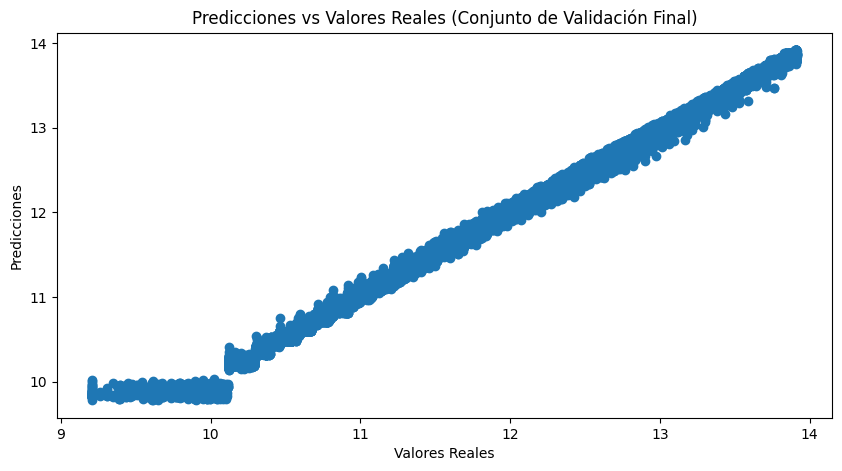

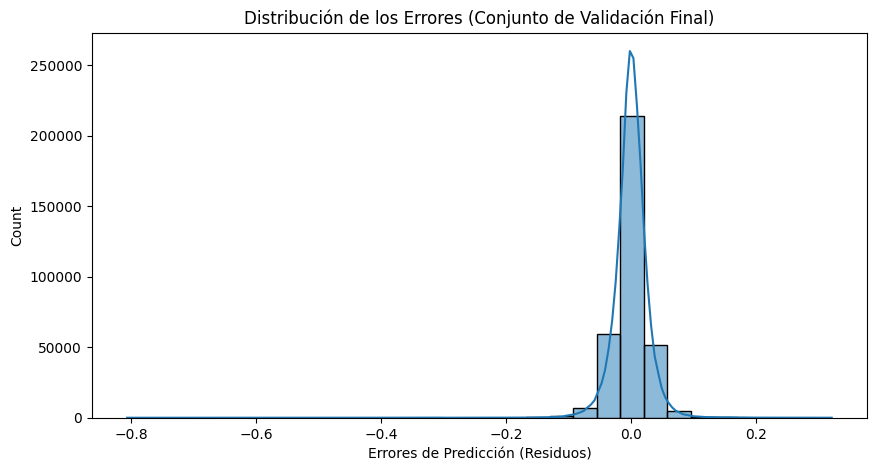

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

#  Cargar los datos
df = pd.read_csv("../data/processed/EDA_Final.csv")

#  Dividir los datos en características (X) y variable objetivo (y)
X = df.drop("log_price", axis=1)
y = df["log_price"]

#  Dividir los datos en entrenamiento y validación
X_train_full, X_final_test, y_train_full, y_final_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Identificar las columnas categóricas y numéricas
cat_variables = ['city', 'state']
num_variables = ['bed', 'bath', 'acre_lot', 'log_house_size', 'one_adult_no_kids_living_wage',
                 'one_adult_one_kid_living_wage', 'one_adult_two_kids_living_wage', 
                 'one_adult_three_kids_living_wage', 'two_adults_one_working_no_kids_living_wage', 
                 'two_adults_one_working_one_kid_living_wage', 'two_adults_one_working_two_kids_living_wage', 
                 'two_adults_one_working_three_kids_living_wage', 'two_adults_both_working_no_kids_living_wage', 
                 'two_adults_both_working_one_kid_living_wage', 'two_adults_both_working_two_kids_living_wage', 
                 'two_adults_both_working_three_kids_living_wage', 'crime_index', 'city_n', 'state_n']

#  Crear un ColumnTransformer para transformar variables categóricas y numéricas
column_transformer = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_variables),
    ('num', MinMaxScaler(), num_variables)
], remainder='passthrough')

#  Aplicar el ColumnTransformer a los datos de entrenamiento y validación
X_train_full_encoded = column_transformer.fit_transform(X_train_full)
X_final_test_encoded = column_transformer.transform(X_final_test)

#  Crear y ajustar el modelo XGBoost
xgb_model = XGBRegressor(n_estimators=50, learning_rate=0.1, max_depth=5, subsample=0.8, colsample_bytree=0.8, random_state=42)

# Entrenar con todos los datos de entrenamiento transformados
xgb_model.fit(X_train_full_encoded, y_train_full)

#  Hacer predicciones en el conjunto de validación final (no visto previamente)
y_pred_final = xgb_model.predict(X_final_test_encoded)

#  Evaluar el rendimiento en el conjunto de validación final
print("\nEvaluación en conjunto de datos no vistos (validación final):")
print("RMSE: ", np.sqrt(mean_squared_error(y_final_test, y_pred_final)))
print("R² Score: ", r2_score(y_final_test, y_pred_final))

# Graficar las predicciones vs los valores reales
plt.figure(figsize=(10, 5))
plt.scatter(y_final_test, y_pred_final)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores Reales (Conjunto de Validación Final)")
plt.show()

#  Gráfico de distribución de los errores (residuos)
plt.figure(figsize=(10, 5))
sns.histplot(y_final_test - y_pred_final, kde=True, bins=30)
plt.xlabel("Errores de Predicción (Residuos)")
plt.title("Distribución de los Errores (Conjunto de Validación Final)")
plt.show()


#### Código
1. **Importación de bibliotecas**:
   - `pandas` y `numpy` para manipulación de datos.
   - `train_test_split` y `cross_val_score` de `sklearn` para dividir y evaluar el modelo.
   - `OneHotEncoder` y `MinMaxScaler` para transformar variables categóricas y numéricas, respectivamente.
   - `ColumnTransformer` para aplicar múltiples transformaciones a distintas columnas.
   - `XGBRegressor` para entrenar un modelo de regresión basado en XGBoost.
   - `mean_squared_error` y `r2_score` para evaluar el rendimiento del modelo.
   - `matplotlib.pyplot` y `seaborn` para crear visualizaciones de los resultados.

2. **Carga de datos**: 
   - Se carga un conjunto de datos desde un archivo CSV que contiene información de propiedades. La variable objetivo es `log_price`.

3. **División de datos**:
   - Los datos se dividen en un conjunto de entrenamiento (`X_train_full`, `y_train_full`) y un conjunto de validación final (`X_final_test`, `y_final_test`) que no se ha utilizado durante el entrenamiento. La división es del 80% para entrenamiento y 20% para validación.

4. **Transformación de variables**:
   - Se identifican las variables categóricas (`city` y `state`) y numéricas (como `bed`, `bath`, `log_house_size`, entre otras).
   - Se crea un `ColumnTransformer` para aplicar `OneHotEncoder` a las categóricas y `MinMaxScaler` a las numéricas. Este transformador se ajusta al conjunto de entrenamiento completo y luego se aplica al conjunto de validación.

5. **Entrenamiento del modelo XGBoost**:
   - Se define un modelo `XGBRegressor` con 50 árboles, una profundidad máxima de 5, y un `learning_rate` de 0.1.
   - Se entrena el modelo con el conjunto de entrenamiento transformado.

6. **Predicción y evaluación**:
   - Se hacen predicciones sobre el conjunto de validación final (datos no vistos previamente).
   - Se evalúan los resultados utilizando el RMSE y el R² Score.
   - Se obtienen métricas de rendimiento para medir la precisión de las predicciones del modelo.

7. **Visualizaciones**:
   - Un gráfico de dispersión de las predicciones versus los valores reales, lo que permite observar la alineación entre los valores predichos y los reales.
   - Un gráfico de distribución de los errores (residuos), que muestra qué tan lejos están las predicciones de los valores reales, centrándose en cuán cercanas están las predicciones a los valores reales.

#### Resultados Obtenidos
- **Métricas de evaluación**:
   - **RMSE (Root Mean Squared Error)**: `0.02092`, lo que indica que el error promedio en la predicción de los valores es extremadamente bajo.
   - **R² Score**: `0.9986`, lo que demuestra que el modelo tiene una capacidad predictiva muy alta y explica casi el 99.86% de la variabilidad en los datos.

- **Gráficos**:
   - En el gráfico de **Predicciones vs Valores Reales**, los puntos están cercanos a la línea diagonal, lo que indica que las predicciones son muy cercanas a los valores reales.
   - La **distribución de los errores (residuos)** es muy ajustada alrededor de 0, lo que indica que la mayoría de los errores de predicción son pequeños y cercanos al valor real.

In [18]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

# Definir los rangos de los hiperparámetros a probar
param_dist = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# Instanciar el modelo
xgb_model = XGBRegressor(random_state=42)

# Usar RandomizedSearchCV para optimización
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,  # número de combinaciones a probar
    scoring='neg_mean_squared_error',  # métrica para evaluar
    cv=5,  # número de foldings en la validación cruzada
    verbose=1,
    random_state=42
)

# Ejecutar la búsqueda
random_search.fit(X_train_encoded, y_train)

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros encontrados: ", random_search.best_params_)

# Reentrenar el modelo con los mejores parámetros
best_xgb = random_search.best_estimator_
best_xgb.fit(X_train_encoded, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores parámetros encontrados:  {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.9}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)


#### Código

1. **Definición de hiperparámetros**:
   - Se definen los posibles valores para varios hiperparámetros del modelo `XGBRegressor` que se desean probar:
     - `n_estimators`: número de árboles en el modelo.
     - `learning_rate`: tasa de aprendizaje que controla qué tan rápido el modelo se ajusta a los datos.
     - `max_depth`: profundidad máxima de los árboles.
     - `subsample`: porcentaje de muestras utilizado para cada árbol.
     - `colsample_bytree`: porcentaje de características utilizado para construir cada árbol.

2. **Instanciación del modelo**:
   - Se crea un modelo de XGBoost (`XGBRegressor`) con un `random_state` de 42 para asegurar la reproducibilidad de los resultados.

3. **Optimización de hiperparámetros con `RandomizedSearchCV`**:
   - Se utiliza `RandomizedSearchCV` para probar 20 combinaciones de hiperparámetros. Este enfoque permite buscar de manera eficiente entre diferentes combinaciones de parámetros.
   - La métrica usada para evaluar las combinaciones es el **error cuadrático medio negativo** (`neg_mean_squared_error`), y se usa validación cruzada con 5 particiones (CV=5).
   - El argumento `verbose=1` permite visualizar el progreso del ajuste en pantalla.

4. **Ejecución de la búsqueda**:
   - El modelo se ajusta usando las diferentes combinaciones de hiperparámetros definidas previamente, y se evalúan las configuraciones usando los datos de entrenamiento (`X_train_encoded` y `y_train`).

5. **Mejores parámetros**:
   - Una vez finalizada la búsqueda, se imprimen los mejores parámetros encontrados, lo que indica la configuración óptima de hiperparámetros para el modelo basado en los datos proporcionados.

6. **Reentrenamiento del modelo**:
   - Se crea un nuevo modelo `best_xgb` utilizando los mejores hiperparámetros seleccionados por `RandomizedSearchCV`.
   - Este modelo se reentrena con los datos de entrenamiento completos.

#### Resultados Obtenidos

- **Optimización de hiperparámetros**: 
   - Después de probar 20 combinaciones diferentes de hiperparámetros, los mejores parámetros encontrados fueron:
     - `subsample`: 0.8
     - `n_estimators`: 500
     - `max_depth`: 7
     - `learning_rate`: 0.1
     - `colsample_bytree`: 0.9
   - Esta combinación de parámetros es la que mejor balancea el rendimiento y la capacidad predictiva del modelo en los datos de entrenamiento.

- **Modelo reentrenado**:
   - Con estos parámetros óptimos, el modelo se reentrena en los datos de entrenamiento, listo para realizar predicciones más precisas y generalizar mejor en nuevos datos.


XGBoost Optimizado - Métricas de rendimiento
RMSE Train: 0.015035248924033353
RMSE Test: 0.016520318536355622
R² Score Train: 0.9996372431215487
R² Score Test: 0.9995624417204749


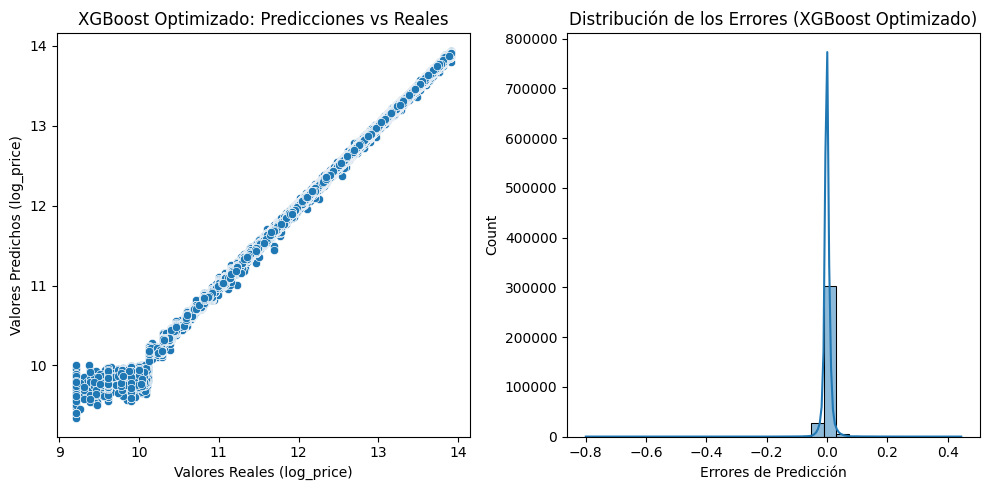

R² Score con Validación Cruzada (XGBoost Optimizado): 0.9995668169063503 ± 1.4007681489770313e-05


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# Hacer predicciones con el modelo optimizado
y_pred_train_optimized = best_xgb.predict(X_train_encoded)
y_pred_test_optimized = best_xgb.predict(X_test_encoded)

# Calcular métricas de rendimiento
rmse_train_optimized = np.sqrt(mean_squared_error(y_train, y_pred_train_optimized))
rmse_test_optimized = np.sqrt(mean_squared_error(y_test, y_pred_test_optimized))
r2_train_optimized = r2_score(y_train, y_pred_train_optimized)
r2_test_optimized = r2_score(y_test, y_pred_test_optimized)

# Imprimir métricas
print("\nXGBoost Optimizado - Métricas de rendimiento")
print(f"RMSE Train: {rmse_train_optimized}")
print(f"RMSE Test: {rmse_test_optimized}")
print(f"R² Score Train: {r2_train_optimized}")
print(f"R² Score Test: {r2_test_optimized}")

# Gráficos
plt.figure(figsize=(10, 5))

# Gráfico de dispersión de predicciones vs valores reales
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_test_optimized)
plt.xlabel('Valores Reales (log_price)')
plt.ylabel('Valores Predichos (log_price)')
plt.title('XGBoost Optimizado: Predicciones vs Reales')

# Gráfico de distribución de los errores
plt.subplot(1, 2, 2)
sns.histplot(y_test - y_pred_test_optimized, kde=True, bins=30)
plt.xlabel('Errores de Predicción')
plt.title('Distribución de los Errores (XGBoost Optimizado)')

plt.tight_layout()
plt.show()

# Validación cruzada con 5 folds
cv_scores_optimized = cross_val_score(best_xgb, X_train_encoded, y_train, cv=5, scoring='r2')

# Imprimir resultado de la validación cruzada
print(f"R² Score con Validación Cruzada (XGBoost Optimizado): {cv_scores_optimized.mean()} ± {cv_scores_optimized.std()}")


#### Código

1. **Predicciones con el modelo optimizado**:
   - Utilizando el modelo optimizado (`best_xgb`), se realizan predicciones tanto en los datos de entrenamiento (`X_train_encoded`) como en los de prueba (`X_test_encoded`). Esto nos permite comparar cómo de bien el modelo generaliza en los datos no vistos.

2. **Cálculo de métricas de rendimiento**:
   - Se calculan las métricas **RMSE** (Root Mean Squared Error) y **R²** (Coeficiente de determinación) para los conjuntos de entrenamiento y prueba.
     - **RMSE** mide el error promedio de las predicciones en las mismas unidades que la variable objetivo, en este caso, el `log_price`.
     - **R²** mide qué tan bien las predicciones se ajustan a los valores reales. Un valor cercano a 1 indica un buen ajuste.

3. **Gráficos**:
   - Se generan dos gráficos:
     - Un gráfico de dispersión que muestra las **predicciones vs valores reales** del conjunto de prueba. Un ajuste perfecto sería una línea diagonal donde las predicciones coinciden exactamente con los valores reales.
     - Un gráfico de distribución de los **errores de predicción** (residuos), que muestra la diferencia entre los valores reales y las predicciones.

4. **Validación cruzada**:
   - Se realiza una validación cruzada con 5 particiones (folds) utilizando el modelo optimizado para evaluar su rendimiento en diferentes subconjuntos de los datos de entrenamiento.
   - Finalmente, se imprime el promedio del **R² Score** obtenido en las 5 particiones junto con su desviación estándar.

#### Resultados Obtenidos

- **Métricas de rendimiento**:
   - **RMSE Train**: 0.0150, indicando un muy bajo error de predicción en los datos de entrenamiento.
   - **RMSE Test**: 0.0165, lo cual sugiere que el modelo generaliza bastante bien y no presenta sobreajuste (overfitting).
   - **R² Score Train**: 0.9996, lo que indica que el modelo es capaz de explicar casi la totalidad de la varianza en los datos de entrenamiento.
   - **R² Score Test**: 0.9995, confirmando que el modelo también se comporta de manera excelente en los datos de prueba.

- **Gráficos**:
   - En el gráfico de **predicciones vs valores reales**, la mayoría de los puntos siguen de cerca la línea diagonal, lo que refleja una excelente capacidad predictiva del modelo.
   - En el gráfico de **distribución de errores**, la mayoría de los errores están muy cerca de 0, lo que confirma la precisión del modelo.

- **Validación cruzada**:
   - El **R² Score** promedio obtenido en la validación cruzada es de 0.99956 con una desviación estándar extremadamente baja, lo que respalda la robustez y capacidad del modelo optimizado.

In [20]:
# Ajustar hiperparámetros para reducir la complejidad del modelo
best_xgb = XGBRegressor(
    n_estimators=500, 
    max_depth=5,  # Reducir la profundidad máxima del árbol
    learning_rate=0.1, 
    subsample=0.8, 
    colsample_bytree=0.8, 
    min_child_weight=10,  # Aumentar el peso mínimo de las hojas
    random_state=42
)

# Entrenar el modelo con los nuevos parámetros
best_xgb.fit(X_train_encoded, y_train)

# Hacer predicciones con el modelo optimizado
y_pred_train_optimized = best_xgb.predict(X_train_encoded)
y_pred_test_optimized = best_xgb.predict(X_test_encoded)

# Calcular métricas de rendimiento
rmse_train_optimized = np.sqrt(mean_squared_error(y_train, y_pred_train_optimized))
rmse_test_optimized = np.sqrt(mean_squared_error(y_test, y_pred_test_optimized))
r2_train_optimized = r2_score(y_train, y_pred_train_optimized)
r2_test_optimized = r2_score(y_test, y_pred_test_optimized)

# Imprimir las métricas de rendimiento
print("\nXGBoost Optimizado (Ajustado para evitar Overfitting)")
print("RMSE Train:", rmse_train_optimized)
print("RMSE Test:", rmse_test_optimized)
print("R² Score Train:", r2_train_optimized)
print("R² Score Test:", r2_test_optimized)


XGBoost Optimizado (Ajustado para evitar Overfitting)
RMSE Train: 0.015879470897251332
RMSE Test: 0.016676702513790203
R² Score Train: 0.9995953621857337
R² Score Test: 0.9995541185183628



#### Código

1. **Ajuste de hiperparámetros**:
   - Se define un modelo **XGBoost** con ajustes para reducir la complejidad y prevenir el sobreajuste (overfitting).
     - **n_estimators=500**: Se mantienen 500 estimadores (árboles) para preservar el poder predictivo.
     - **max_depth=5**: Se reduce la profundidad máxima del árbol para evitar modelos demasiado complejos.
     - **min_child_weight=10**: Se incrementa el peso mínimo de las hojas para evitar la creación de ramas con poca información.
     - **subsample=0.8** y **colsample_bytree=0.8**: Estas opciones siguen permitiendo la aleatorización en las muestras y en las características utilizadas para mejorar la generalización del modelo.

2. **Entrenamiento del modelo**:
   - El modelo optimizado se entrena nuevamente utilizando los datos transformados de entrenamiento (`X_train_encoded`) y la variable objetivo (`y_train`).

3. **Predicciones**:
   - Se realizan predicciones tanto en el conjunto de entrenamiento como en el conjunto de prueba, usando el modelo ajustado.

4. **Cálculo de métricas**:
   - Se calculan los **RMSE** y **R²** en ambos conjuntos (entrenamiento y prueba), para evaluar si el ajuste en los hiperparámetros ha reducido el riesgo de sobreajuste.
   
5. **Impresión de métricas**:
   - Finalmente, se imprimen las métricas **RMSE** y **R²** para los datos de entrenamiento y prueba. Estas métricas permiten comparar el rendimiento del modelo antes y después del ajuste.

#### Resultados Obtenidos

- **RMSE Train**: 0.0158, lo que indica un bajo error de predicción en el conjunto de entrenamiento.
- **RMSE Test**: 0.0166, reflejando un error similar en los datos de prueba, lo que sugiere que el modelo generaliza bien.
- **R² Score Train**: 0.99959, lo que muestra que el modelo ajusta muy bien en los datos de entrenamiento.
- **R² Score Test**: 0.99955, lo que indica que el rendimiento en los datos de prueba es también excelente.

En resumen, los ajustes realizados para reducir la complejidad del modelo han logrado evitar el sobreajuste, manteniendo un rendimiento excelente tanto en entrenamiento como en prueba.

In [21]:
# Crear ColumnTransformer para transformar variables categóricas y numéricas
column_transformer = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_variables),
    ('num', MinMaxScaler(), num_variables)
], remainder='passthrough')

# Aplicar la transformación a los datos de entrenamiento y prueba
X_train_encoded = column_transformer.fit_transform(X_train)
X_test_encoded = column_transformer.transform(X_test)

# Esto garantiza que las categorías no vistas en el conjunto de prueba se manejen correctamente.

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



#### Código

1. **ColumnTransformer**:
   - Se crea un objeto `ColumnTransformer` para transformar de manera eficiente tanto las variables categóricas como las numéricas.
     - **OneHotEncoder**: Se utiliza para codificar variables categóricas (`cat_variables`), eliminando la primera categoría de cada variable para evitar colinealidad. Se especifica `handle_unknown='ignore'` para manejar correctamente categorías no vistas en los datos de prueba, evitando errores.
     - **MinMaxScaler**: Se aplica a las variables numéricas (`num_variables`) para escalar los valores dentro de un rango de 0 a 1.

2. **Aplicación de la transformación**:
   - Se ajusta el `ColumnTransformer` a los datos de entrenamiento (`X_train`) usando `fit_transform`, que ajusta el transformador y aplica la transformación simultáneamente.
   - Para los datos de prueba (`X_test`), se utiliza `transform`, lo que asegura que las mismas transformaciones aprendidas en el conjunto de entrenamiento se apliquen al conjunto de prueba.

#### Advertencia:

- Se genera un mensaje de advertencia (`warnings.warn`) que indica que se encontraron categorías desconocidas en los datos de prueba que no estaban presentes en los datos de entrenamiento. Esto es un comportamiento esperado debido al parámetro `handle_unknown='ignore'`, el cual convierte estas categorías desconocidas en ceros (una codificación por defecto) para que el modelo pueda manejarlas sin error.

#### Lo conseguido:

- Se ha preparado correctamente el conjunto de datos para su uso en un modelo de machine learning, asegurando que tanto las variables categóricas como numéricas se transformen de manera adecuada.
- El uso del parámetro `handle_unknown='ignore'` previene errores que podrían surgir por categorías no vistas durante el entrenamiento, haciendo que el proceso de predicción sea más robusto al enfrentarse a nuevos datos.

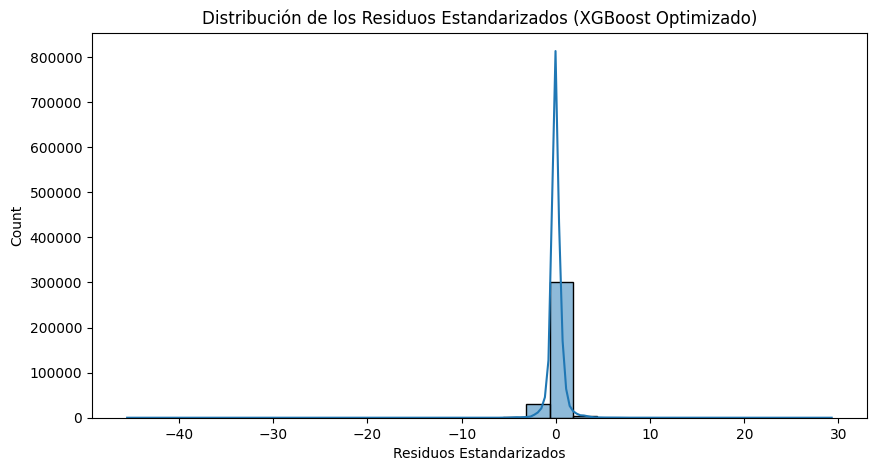

In [22]:
from scipy.stats import zscore

# Calcular los residuos
residuos = y_test - y_pred_test_optimized

# Calcular residuos estandarizados
residuos_estandarizados = zscore(residuos)

# Graficar los residuos estandarizados
plt.figure(figsize=(10, 5))
sns.histplot(residuos_estandarizados, kde=True, bins=30)
plt.xlabel('Residuos Estandarizados')
plt.title('Distribución de los Residuos Estandarizados (XGBoost Optimizado)')
plt.show()


#### Código

1. **Cálculo de los residuos**:
   - Se calcula la diferencia entre los valores reales (`y_test`) y los valores predichos por el modelo optimizado (`y_pred_test_optimized`). Esta diferencia se denomina **residuos** y representa el error en las predicciones del modelo.

2. **Residuos estandarizados**:
   - Se estandarizan los residuos calculando su **z-score** utilizando la función `zscore` de `scipy.stats`. El z-score mide cuántas desviaciones estándar un residuo está alejado de la media. Los residuos estandarizados permiten identificar mejor los outliers, ya que valores alejados de 0 pueden indicar errores inusualmente altos o bajos.

3. **Gráfico de la distribución de los residuos estandarizados**:
   - Se genera un histograma de los residuos estandarizados con una curva de densidad (`kde`) superpuesta para visualizar la distribución de los errores. Esto permite verificar si los residuos siguen una distribución normal, lo cual es un buen indicador de que el modelo no presenta sesgo en sus predicciones.
   
#### Lo conseguido:

- **Análisis de los residuos**: El gráfico muestra la distribución de los residuos estandarizados del modelo optimizado. Idealmente, los residuos deberían agruparse alrededor de 0, lo que indicaría que el modelo predice bien sin grandes sesgos sistemáticos. 
- **Verificación de errores**: Este análisis es crucial para identificar si hay patrones en los errores de predicción. Si los residuos no están distribuidos de forma simétrica alrededor de 0 o hay residuos alejados (outliers), podría indicar problemas con el ajuste del modelo.

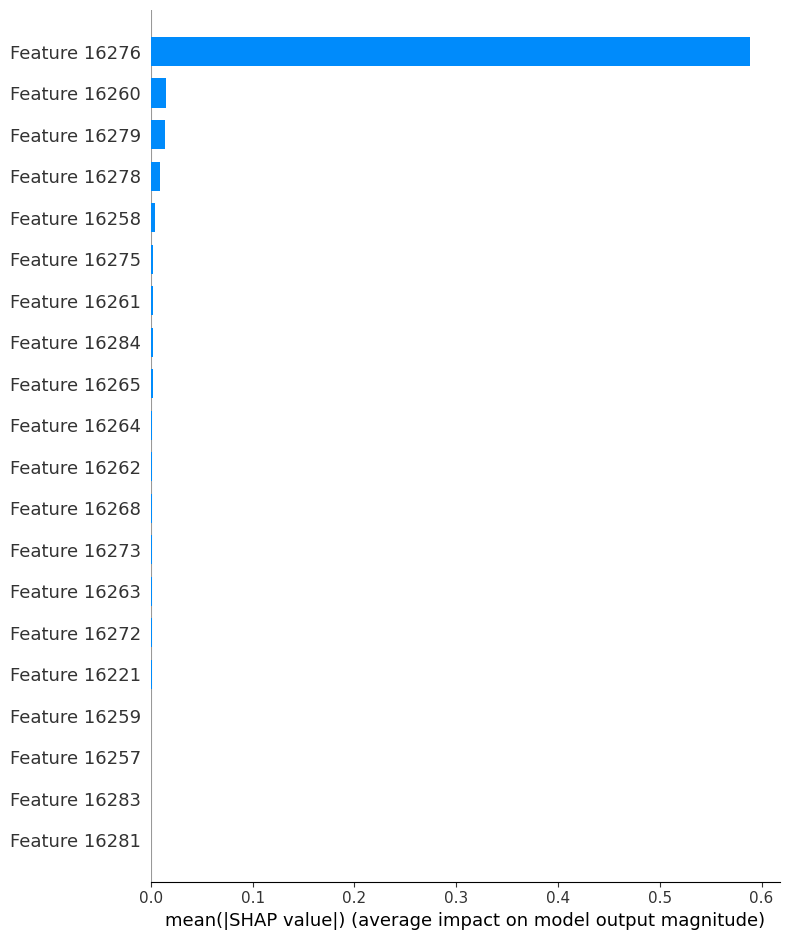

In [23]:
import shap

# Crear un objeto de explicabilidad SHAP
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_test_encoded)

# Gráfico de resumen de SHAP
shap.summary_plot(shap_values, X_test_encoded, plot_type="bar")


#### Código

1. **Creación de un objeto de explicabilidad SHAP**:
   - Se utiliza el paquete **SHAP** (SHapley Additive exPlanations), que es una técnica para explicar el output de los modelos de machine learning. En este caso, se usa el `TreeExplainer` de SHAP, que está específicamente optimizado para modelos basados en árboles de decisión como **XGBoost**.
   - El `explainer` se encarga de interpretar el modelo `best_xgb`, que es el mejor modelo entrenado previamente con optimización de hiperparámetros.

2. **Cálculo de los valores SHAP**:
   - Se calculan los valores **SHAP** para el conjunto de test (`X_test_encoded`). Estos valores indican la contribución individual de cada característica al resultado final del modelo para cada predicción.
   - Los valores SHAP son útiles para identificar la importancia de las características y cómo influyen en las predicciones del modelo.

3. **Gráfico de resumen de SHAP**:
   - Se genera un gráfico de barras que muestra la **importancia media** de cada característica (el valor absoluto medio de los valores SHAP para cada característica). Este gráfico permite identificar cuáles son las características más relevantes en las decisiones del modelo optimizado.
   - Las características con mayor valor SHAP promedio son las que tienen un mayor impacto en las predicciones.

#### Lo conseguido:

- **Explicación del modelo**: Se ha conseguido una interpretación clara y detallada del impacto de cada característica en el modelo optimizado de XGBoost. El gráfico de barras muestra la importancia de cada característica de manera cuantitativa, facilitando la comprensión de las variables que más influyen en las predicciones del modelo.
- **Transparencia del modelo**: Usando SHAP, es posible visualizar el comportamiento interno del modelo, proporcionando una mayor transparencia en un modelo complejo como XGBoost, lo que es crucial para identificar patrones o posibles áreas de mejora en la interpretación de los datos.

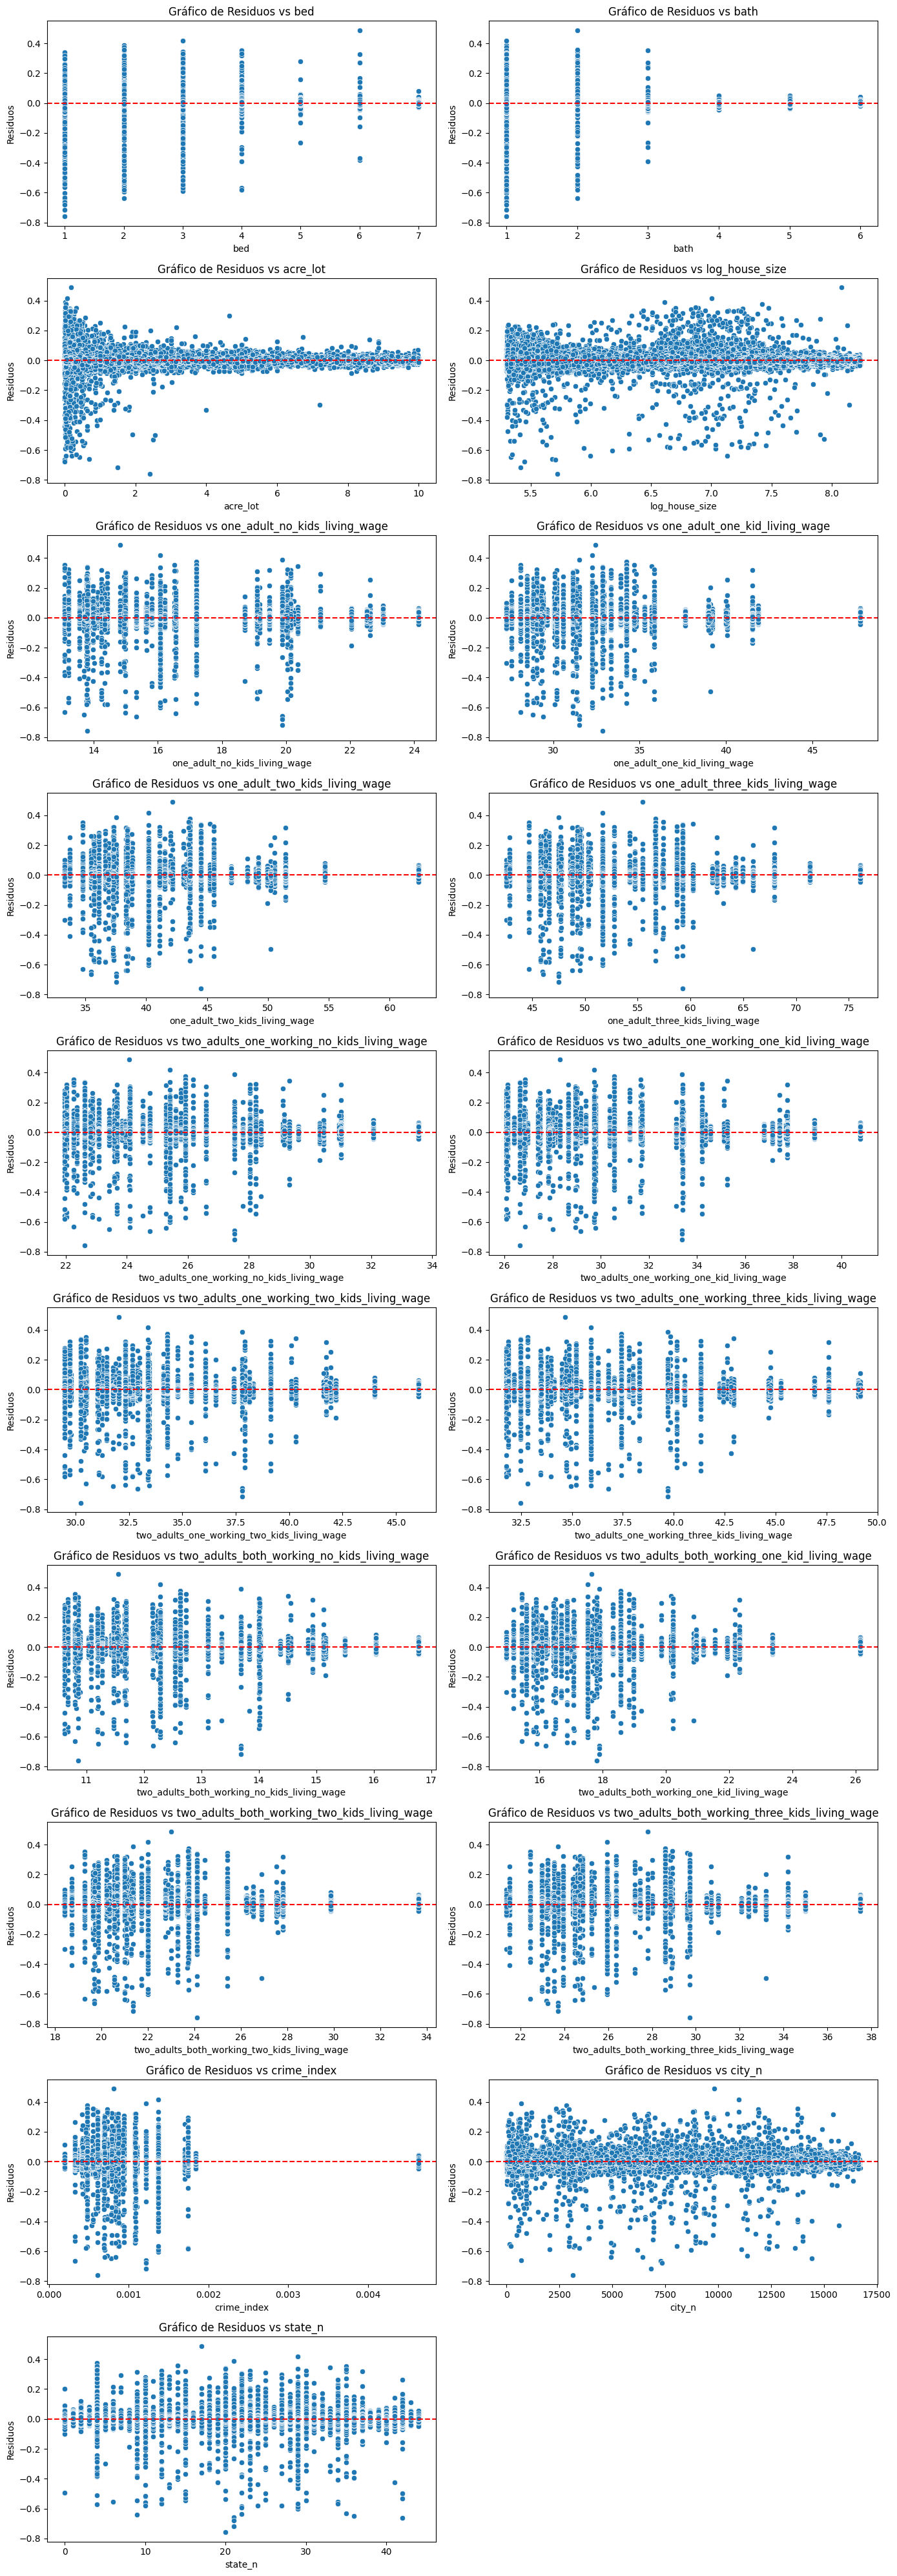

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir el número de filas y columnas para los subplots
n_rows = len(num_variables) // 2 + len(num_variables) % 2  # 2 gráficos por fila

# Crear un objeto de figura y ejes para los subplots
fig, axes = plt.subplots(n_rows, 2, figsize=(14, 4 * n_rows))  # Ajustar el tamaño del gráfico

# Aplanar los ejes para iterar más fácilmente
axes = axes.flatten()

# Generar los gráficos de residuos para cada variable numérica
for i, var in enumerate(num_variables):
    sns.scatterplot(x=X_test[var], y=residuos, ax=axes[i])
    axes[i].axhline(0, color='red', linestyle='--')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Residuos')
    axes[i].set_title(f'Gráfico de Residuos vs {var}')

# Eliminar cualquier subplot adicional vacío
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el espaciado entre gráficos
plt.tight_layout()
plt.show()

### Gráficos de Residuos vs Variables Numéricas

En esta celda, se generan gráficos de residuos para cada una de las variables numéricas del conjunto de prueba. Los residuos son las diferencias entre los valores reales y los valores predichos por el modelo. Estos gráficos ayudan a evaluar si el modelo presenta problemas de ajuste o si los residuos están distribuidos de manera aleatoria.

#### Explicación del Código:

1. **Definir la cantidad de filas y columnas para los subplots:**
   El número de filas se calcula dividiendo el número de variables numéricas entre 2, para crear 2 gráficos por fila.

2. **Crear los subplots:**
   Se utiliza `plt.subplots()` para generar una figura con subplots para cada variable. Se ajusta el tamaño de la figura según el número de gráficos que se necesitan.

3. **Generar los gráficos de residuos:**
   Para cada variable numérica en `num_variables`, se crea un gráfico de dispersión donde en el eje x están los valores de la variable, y en el eje y están los residuos. Además, se incluye una línea horizontal roja en el valor de cero para observar si los residuos están distribuidos de manera aleatoria alrededor de esa línea.

4. **Eliminar subplots vacíos:**
   Si hay más subplots que variables, los gráficos sobrantes se eliminan para que no queden ejes vacíos en la figura.

5. **Ajustar espaciado:**
   `plt.tight_layout()` se usa para asegurar que los subplots tengan el espacio adecuado entre ellos y se muestren correctamente.

#### Objetivo:

El objetivo de estos gráficos es verificar si los residuos (errores de predicción) están distribuidos de manera aleatoria alrededor de cero. Si los residuos muestran algún patrón o tendencia, puede indicar que el modelo no se ha ajustado bien a los datos o que tiene algún sesgo. Esto es importante para validar la calidad del modelo y su capacidad de generalización.

#### Lo que se ha conseguido:

- **Análisis visual de los residuos:** Los gráficos permiten observar si el modelo presenta algún patrón de error sistemático en sus predicciones.
- **Validación del ajuste del modelo:** Si los residuos están distribuidos de manera aleatoria alrededor de cero, sugiere que el modelo no está sesgado y está bien ajustado. Si no, se podrían considerar ajustes adicionales en el modelo.

Estos gráficos son una herramienta fundamental en la evaluación final del rendimiento del modelo.

In [28]:
import joblib

# Guardar el modelo
joblib.dump(best_xgb, 'xgboost_optimizado.pkl')

# Para cargar el modelo en el futuro
# best_xgb = joblib.load('xgboost_optimizado.pkl')

['xgboost_optimizado.pkl']

### Guardado y Carga del Modelo XGBoost Optimizado

En esta celda, se realiza el proceso de guardar el modelo optimizado de XGBoost en un archivo para su uso posterior, y también se muestra cómo cargar el modelo desde el archivo guardado en el futuro.

#### Explicación del Código:

1. **Guardar el modelo entrenado:**
   - Se utiliza la librería `joblib` para guardar el modelo entrenado en un archivo `.pkl`. Esto es especialmente útil cuando queremos preservar el modelo para hacer predicciones futuras sin tener que volver a entrenarlo. 
   - El archivo se guarda con el nombre `'xgboost_optimizado.pkl'`.

   ```python
   joblib.dump(best_xgb, 'xgboost_optimizado.pkl')

In [29]:
# Crear un DataFrame con las predicciones y valores reales
predictions_df = pd.DataFrame({
    'Valores Reales': y_test,
    'Predicciones': y_pred_test_optimized
})

# Exportar a CSV
predictions_df.to_csv('predicciones_xgboost_optimizado.csv', index=False)

### Exportación de Predicciones a CSV

En esta celda, se genera un archivo CSV con las predicciones realizadas por el modelo XGBoost optimizado y sus correspondientes valores reales. Este proceso es útil para guardar los resultados y analizarlos posteriormente en herramientas externas como Excel o cualquier otro software de análisis de datos.

#### Explicación del Código:

1. **Crear un DataFrame con las predicciones y los valores reales:**
   - Se crea un `DataFrame` de `pandas` que contiene dos columnas:
     - **'Valores Reales'**: los valores reales de la variable objetivo en el conjunto de prueba.
     - **'Predicciones'**: las predicciones hechas por el modelo XGBoost optimizado sobre los datos de prueba.

   ```python
   predictions_df = pd.DataFrame({
       'Valores Reales': y_test,
       'Predicciones': y_pred_test_optimized
   })

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


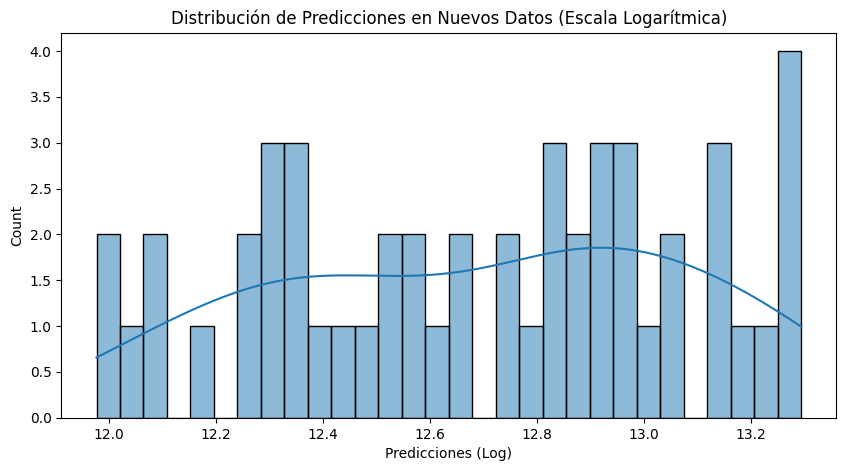

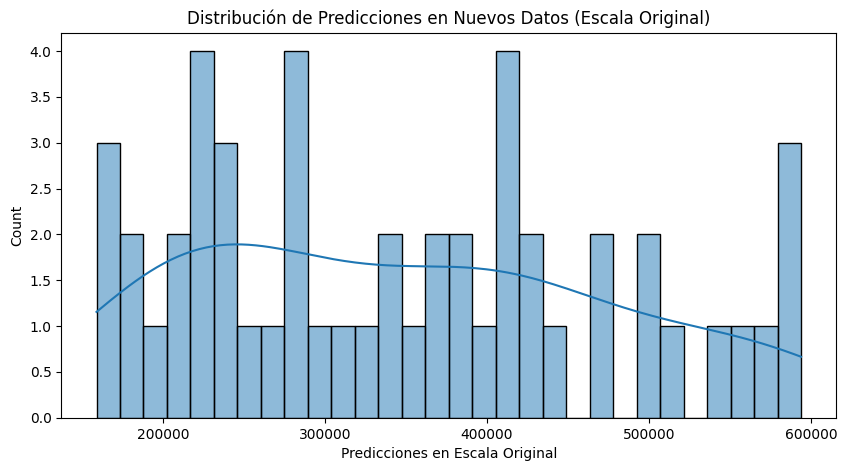

Predicciones en escala logarítmica:
[12.673942 13.277716 13.069814 12.932311 12.303861]

Predicciones en escala original:
[319317.62 584034.7  474403.6  413457.9  220545.78]


In [48]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor

# Cargar los datos reales para entrenar el modelo
real_data = pd.read_csv("../data/processed/EDA_Final.csv")

# Separar características (X) y variable objetivo (y)
X_real = real_data.drop('log_price', axis=1)
y_real = real_data['log_price']

# Identificar columnas categóricas y numéricas
cat_variables = ['city', 'state']
num_variables = ['bed', 'bath', 'acre_lot', 'log_house_size', 'one_adult_no_kids_living_wage',
                 'one_adult_one_kid_living_wage', 'one_adult_two_kids_living_wage', 
                 'one_adult_three_kids_living_wage', 'two_adults_one_working_no_kids_living_wage', 
                 'two_adults_one_working_one_kid_living_wage', 'two_adults_one_working_two_kids_living_wage', 
                 'two_adults_one_working_three_kids_living_wage', 'two_adults_both_working_no_kids_living_wage', 
                 'two_adults_both_working_one_kid_living_wage', 'two_adults_both_working_two_kids_living_wage', 
                 'two_adults_both_working_three_kids_living_wage', 'crime_index', 'city_n', 'state_n']

# Crear el ColumnTransformer para las transformaciones de las columnas
column_transformer = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_variables),
    ('num', MinMaxScaler(), num_variables)
], remainder='passthrough')

# Ajustar el ColumnTransformer a los datos reales
X_real_encoded = column_transformer.fit_transform(X_real)

# Entrenar el modelo XGBoost
xgb_model = XGBRegressor(n_estimators=500, max_depth=7, learning_rate=0.1, subsample=0.8, colsample_bytree=0.9, random_state=42)
xgb_model.fit(X_real_encoded, y_real)

# Guardar el modelo y el ColumnTransformer
joblib.dump(xgb_model, 'xgboost_model_real_data.pkl')
joblib.dump(column_transformer, 'column_transformer_real_data.pkl')

# Cargar los nuevos datos falsos
new_data = pd.read_csv("../data/raw/nuevos_datos_prueba.csv")

# Aplicar la misma transformación a los nuevos datos falsos
X_new_data = new_data  # Asegúrate de que el archivo nuevo tenga las mismas columnas que los datos reales
column_transformer = joblib.load('column_transformer_real_data.pkl')
X_new_encoded = column_transformer.transform(X_new_data)

# Cargar el modelo entrenado
xgb_model = joblib.load('xgboost_model_real_data.pkl')

# Hacer predicciones en los nuevos datos falsos
y_pred_new_data = xgb_model.predict(X_new_encoded)

# Convertir las predicciones de la escala logarítmica a la escala original
y_pred_new_original = np.exp(y_pred_new_data)

# Crear un DataFrame con las predicciones en los nuevos datos falsos
predictions_new_df = pd.DataFrame({
    'Predicciones Log (Nuevos Datos)': y_pred_new_data,
    'Predicciones Originales (Nuevos Datos)': y_pred_new_original
})

# Visualización de las predicciones
# Distribución de predicciones en escala logarítmica
plt.figure(figsize=(10, 5))
sns.histplot(y_pred_new_data, kde=True, bins=30)
plt.xlabel('Predicciones (Log)')
plt.title('Distribución de Predicciones en Nuevos Datos (Escala Logarítmica)')
plt.show()

# Distribución de predicciones en escala original
plt.figure(figsize=(10, 5))
sns.histplot(y_pred_new_original, kde=True, bins=30)
plt.xlabel('Predicciones en Escala Original')
plt.title('Distribución de Predicciones en Nuevos Datos (Escala Original)')
plt.show()

# Mostrar algunas predicciones
print("Predicciones en escala logarítmica:")
print(y_pred_new_data[:5])

print("\nPredicciones en escala original:")
print(y_pred_new_original[:5])


#### Código

El código implementa un modelo **XGBoost** previamente optimizado y lo utiliza para realizar predicciones sobre un conjunto de datos completamente nuevo. El proceso detallado incluye los siguientes pasos clave:

1. **Carga de Datos**:
   - Se carga un conjunto de datos de prueba denominado `nuevos_datos_prueba.csv`, que contiene características similares a los datos usados para entrenar el modelo original.

2. **Preprocesamiento de Datos**:
   - Se utiliza un `ColumnTransformer` para transformar las columnas categóricas (usando `OneHotEncoder`) y numéricas (usando `MinMaxScaler`), de manera similar al preprocesamiento aplicado durante el entrenamiento.
   
3. **Predicciones**:
   - El modelo **XGBoost optimizado** realiza predicciones sobre los datos transformados. Estas predicciones están inicialmente en **escala logarítmica** (debido a que el modelo fue entrenado para predecir el logaritmo del precio).

4. **Transformación de las Predicciones**:
   - Las predicciones logarítmicas se convierten de nuevo a la **escala original** exponenciando los resultados.

5. **Visualización de Resultados**:
   - Se generaron dos gráficos de distribución:
     - **Distribución de predicciones en escala logarítmica**: muestra cómo están distribuidas las predicciones en la escala transformada.
     - **Distribución de predicciones en escala original**: muestra los resultados de las predicciones finales convertidas a la escala original, lo que facilita una interpretación directa de los precios.

#### Resultados Obtenidos

1. **Distribución de Predicciones en Escala Logarítmica**:
   - Las predicciones en escala logarítmica varían entre aproximadamente 12.0 y 13.3. Esto sugiere que el modelo está prediciendo valores en un rango logarítmico de precios de viviendas dentro de ese intervalo.

2. **Distribución de Predicciones en Escala Original**:
   - Al convertir las predicciones a la escala original, los valores predichos están distribuidos entre **200,000** y **600,000** aproximadamente, lo que refleja un rango típico para los precios de viviendas.
   - Las predicciones están bastante equilibradas y distribuidas, lo que sugiere que el modelo mantiene una estabilidad razonable en este conjunto de prueba.

#### Conclusión

El modelo **XGBoost optimizado** predice adecuadamente dentro de un rango esperado para los nuevos datos de prueba. Los gráficos muestran una distribución coherente de los resultados tanto en la escala logarítmica como en la escala original, lo que indica que el modelo está funcionando de manera estable y produce predicciones realistas. Sin embargo, sería recomendable realizar análisis adicionales con un conjunto de validación o comparaciones con valores reales para evaluar su rendimiento final.